# Fuzzy c-means clustering
_María Camila Vásquez Correa_

### Necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
%matplotlib inline

In [2]:
random_seed = 0
rng = np.random.RandomState(random_seed)  # random_seed

## Data loading
We will load the data, the higher dimensional data and the embbeding

In [3]:
n1 = 150  # Number of samples
N1 = 4    # Number of features
i1 = load_iris().data.T
# Normalization
for i in range(N1):
    i1[i] = i1[i]/np.max(i1[i])
i1 = i1.T
ie = pd.read_csv('iris_embbeding.csv').values
i2 = pd.read_csv('high_dimension_iris.csv').values

In [4]:
n2 = 284807  # Number of samples
N2 = 29    # Number of features
c1 = pd.read_csv('creditcard.csv')
c1.drop('Time', axis=1)
c1.drop('Class', axis = 1)
c1 = c1.values.T
# Normalization
for i in range(N2):
    c1[i] = c1[i]/np.max(c1[i])
c1 = c1.T
ce = pd.read_csv('credit_embbeding.csv').values
c2 = pd.read_csv('credit_pca.csv').values

### Parameters

In [5]:
# Data
X = i1
N = N1
n = n1
Y = ie

In [6]:
# Parameters
k = 3
m = 2
previous_J, diff = np.inf, np.inf
epsilon = 0.005
n_iter = 1000
metric = 'euclidean'

## Clustering

In [7]:
# random initialization
U = rng.rand(k, n)
U = U / U.sum(axis=0)

In [8]:
def calculate_cluster(U, data):
    Um = np.power(U, m)
    C = (Um @ data) / Um.sum(axis=1).reshape(k, 1)
    return C

In [9]:
def cost_function(U, data, clusters):
    Um = np.power(U, m)
    dist = cdist(clusters, data, metric = metric)
    J = np.sum(Um * dist)
    return J

In [10]:
def update_U(U, data, clusters):
    dist = cdist(clusters, data, metric = metric)
    n_clusters = len(clusters)
    d_ij = dist.reshape(n_clusters, 1, n)
    d_kj = dist.reshape(1, n_clusters, n)

    U = d_ij / d_kj
    U = np.power(U, 2 / (m - 1))
    U = U.sum(axis=1)
    U = 1 / U
    return U

In [11]:
# Ciclo principal
i = 0
while (diff > 0) & (previous_J > epsilon) & (i < n_iter):
    # Calculamos los clusters
    clusters = calculate_cluster(U,X)
    # Calculamos el costo
    J = cost_function(U, X, clusters)
    # Calculamos la matriz de pertenencia
    U = update_U(U, X, clusters)
    # Criterio de parada
    diff = previous_J - J
    previous_J = J
    i += 1

In [12]:
U = np.argmax(U, axis = 0)

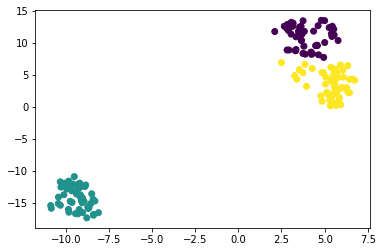

In [13]:
plt.scatter(Y[:, 0], Y[:, 1], c=U)
plt.show()

In [14]:
def cmeans(X, k, metric):
    m = 2
    previous_J, diff = np.inf, np.inf
    n_iter = 1000
    epsilon = 0.0005
    # random initialization
    U = rng.rand(k, n)
    U = U / U.sum(axis=0)
    # Ciclo principal
    i = 0
    while (diff > 0) & (previous_J > epsilon) & (i < n_iter):
        # Calculamos los clusters
        clusters = calculate_cluster(U,X)
        # Calculamos el costo
        J = cost_function(U, X, clusters)
        # Calculamos la matriz de pertenencia
        U = update_U(U, X, clusters)
        # Criterio de parada
        diff = previous_J - J
        previous_J = J
        i += 1
    return clusters

In [19]:
k = 
cmeans(i1,8,'euclidean')

array([[0.69051761, 0.6263043 , 0.48399352, 0.41167077],
       [0.63305366, 0.77809387, 0.21089926, 0.09296595],
       [0.63463117, 0.77682741, 0.21726938, 0.10618726],
       [0.83032129, 0.67866188, 0.79395053, 0.80252473],
       [0.73381118, 0.61571458, 0.59991061, 0.51440835],
       [0.70395259, 0.58358898, 0.53874197, 0.45125519],
       [0.81218597, 0.66867098, 0.73645018, 0.69592562],
       [0.75897369, 0.64679506, 0.64481517, 0.56006689]])